# Exam: Numerical Analysis for Machine Learning
## July 6, 2023

### Exercise 1

Consider the picture

(854, 1280)

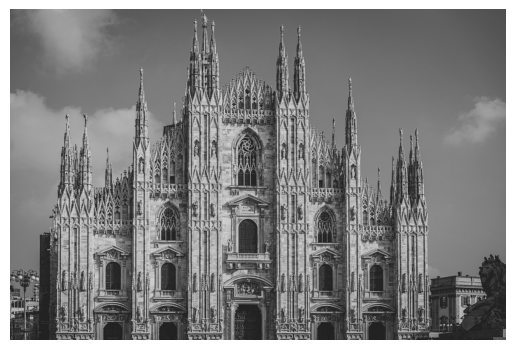

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.image import imread


image_path = 'duomo.jpg'
img = imread(image_path)

A = np.mean(np.array(img, dtype = np.float64)/255, axis = -1)

plt.imshow(A, cmap = 'gray')
plt.axis('off')

A.shape

#### 1) Compute the SVD associated with the picture

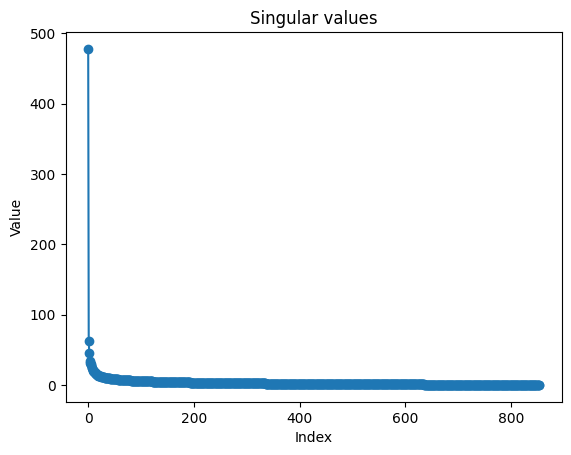

In [2]:
# Exact algorithm for SVD
U, S, VT = np.linalg.svd(A, full_matrices = False)

# Singular values
fig, ax = plt.subplots()

ax.plot(S, 'o-')
ax.set_title('Singular values')
ax.set_xlabel('Index')
ax.set_ylabel('Value')

plt.show()

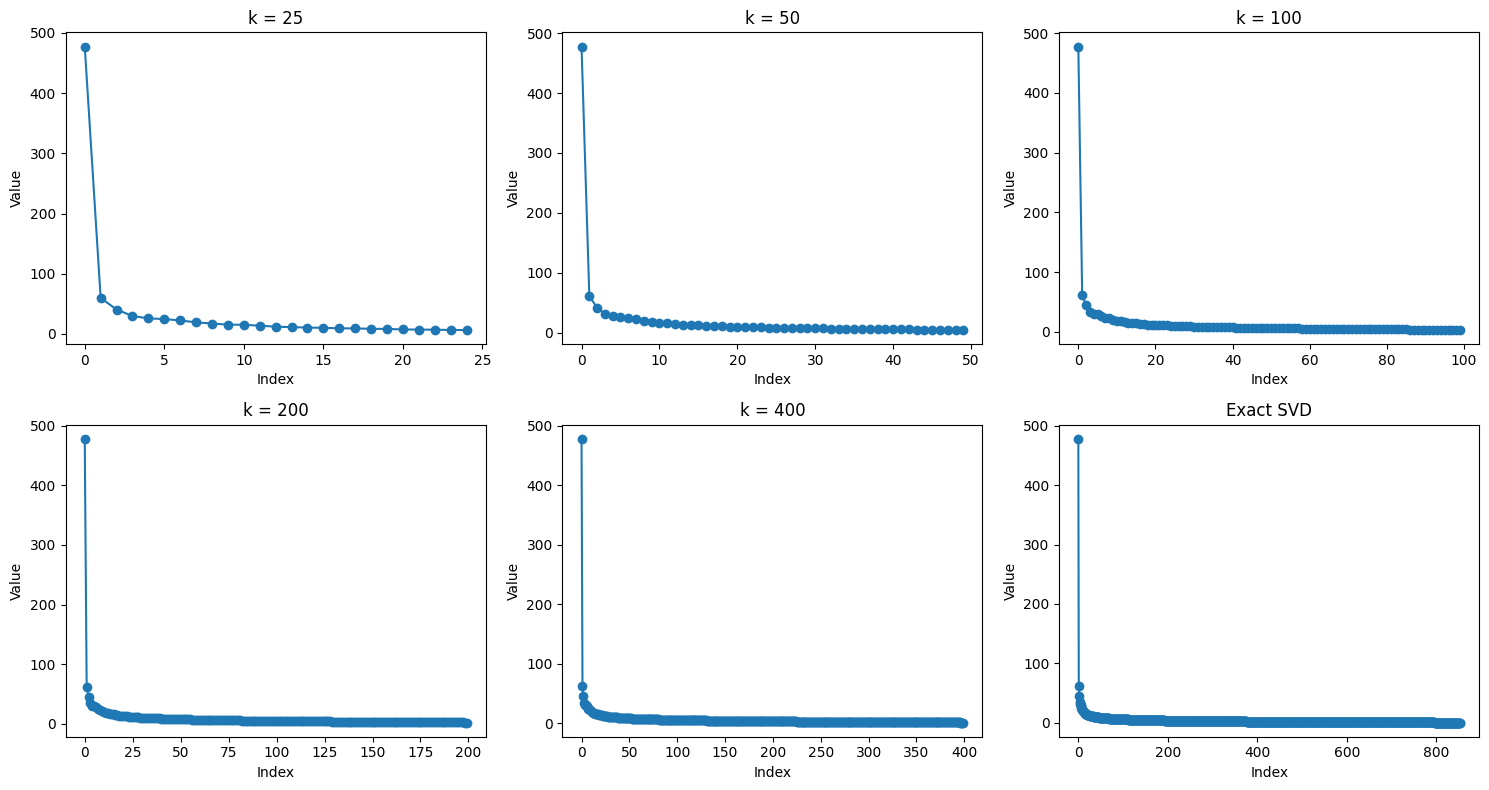

In [3]:
# Randomized SVD

def randomized_svd(A, k):
    m, n = A.shape
    Omega = np.random.randn(n, k)
    Y = A @ Omega
    Q, _ = np.linalg.qr(Y)
    B = Q.T @ A
    U_tilde, S, VT = np.linalg.svd(B, full_matrices = False)
    U = Q @ U_tilde
    return U, S, VT


k_s = [25, 50, 100, 200, 400]

fig, ax = plt.subplots(2, 3, figsize = (15, 8))
ax = ax.flatten()

for i, k in enumerate(k_s):
    U_rand, S_rand, VT_rand = randomized_svd(A, k)
    ax[i].plot(S_rand, 'o-')
    ax[i].set_title(f'k = {k}')
    ax[i].set_xlabel('Index')
    ax[i].set_ylabel('Value')

# Exact SVD
ax[5].plot(S, 'o-')
ax[5].set_title('Exact SVD')
ax[5].set_xlabel('Index')
ax[5].set_ylabel('Value')

plt.tight_layout()
plt.show()

We observe that there is a rapid decay in the singular values of the image. More specifically, the images has a big first singular value, and then the rest are much smaller, and stabilize approximately from the fifth value onwards. With the Randomized SVD, we capture the same behavior as with the exact algorithm, and with each new value of $k$, we compute more singular values of the zone in which their values stabilize and slowly decay.

#### 2) We want to compress the image

* Use the exact SVD with $k = 25, 50, 100, 200, 400$. 
* Repeat with the randomized SVD
* Repeat with random SVD, but with oversampling ($1.5 k$)
* Plot the reconstruction errors. Comment on the results

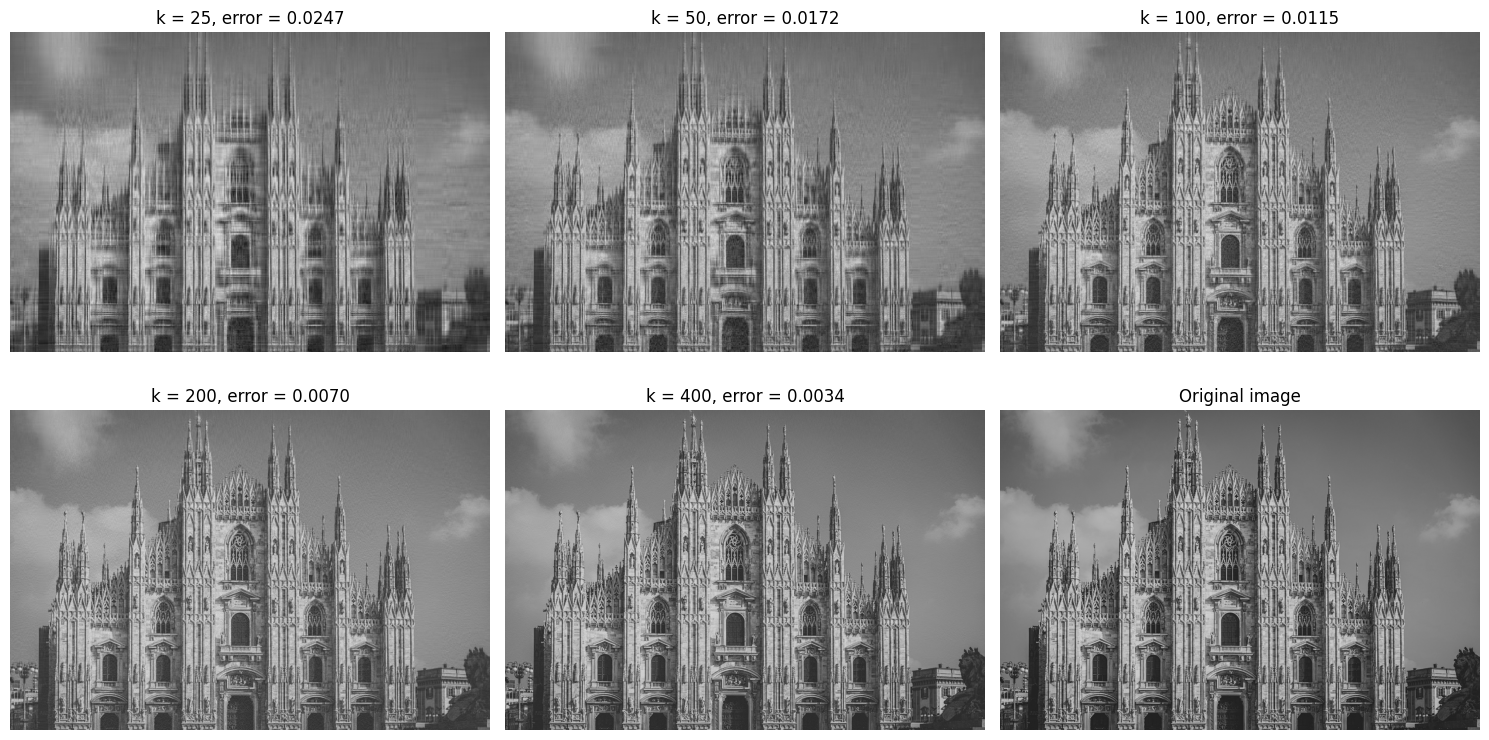

In [4]:
# Compression with exact SVD
U, S, VT = np.linalg.svd(A, full_matrices = False)

k_s = [25, 50, 100, 200, 400]

fig, ax = plt.subplots(2, 3, figsize = (15, 8))
ax = ax.flatten()

errors_exact = []

for i, k in enumerate(k_s):
    A_k = U[:, :k] @ np.diag(S[:k]) @ VT[:k, :]

    error = np.linalg.norm(A - A_k, 2) / np.linalg.norm(A, 2)
    errors_exact.append(error)

    ax[i].imshow(A_k, cmap = 'gray')
    ax[i].axis('off')
    ax[i].set_title(f'k = {k}, error = {error:.4f}')

# Original image
ax[5].imshow(A, cmap = 'gray')
ax[5].axis('off')
ax[5].set_title('Original image')

plt.tight_layout()
plt.show()

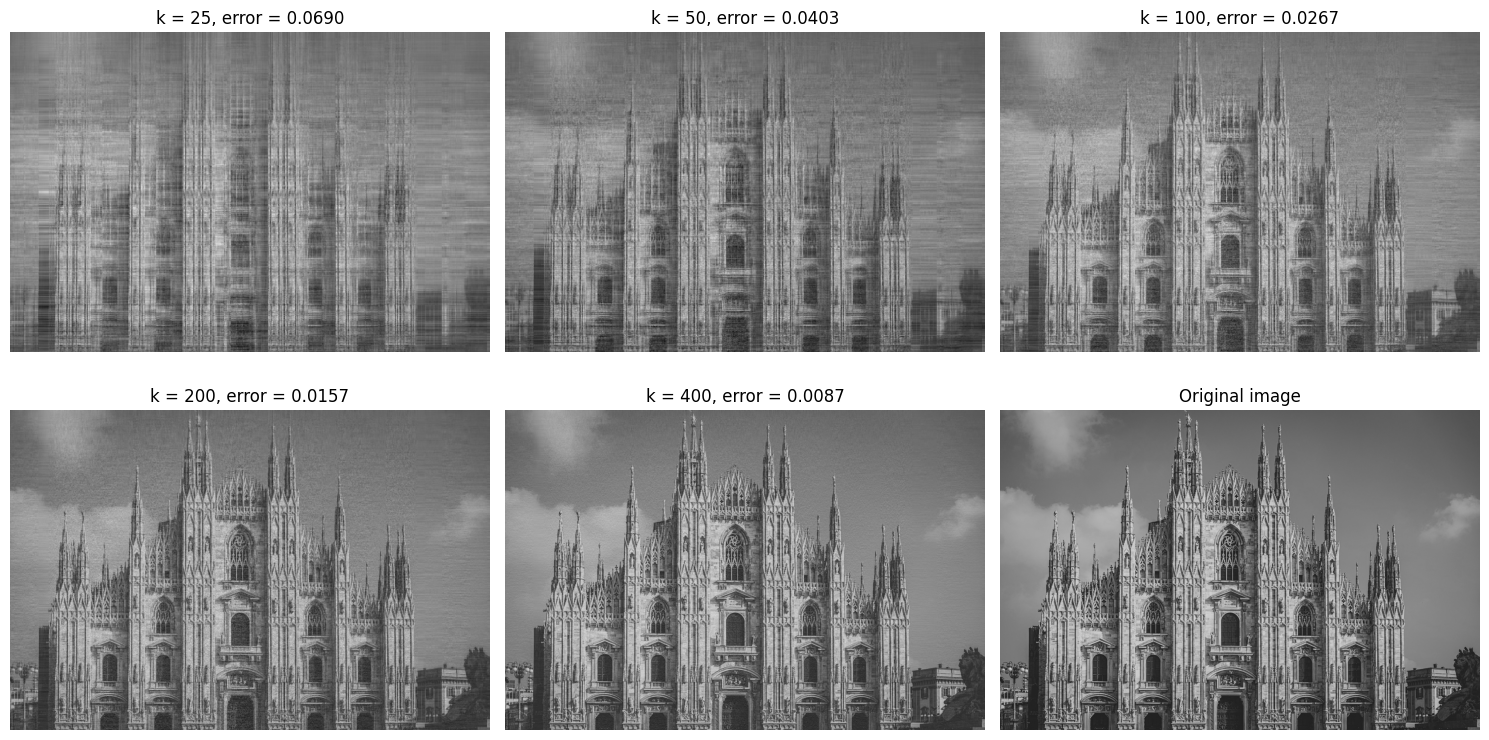

In [5]:
# Compression with randomized SVD
k_s = [25, 50, 100, 200, 400]

fig, ax = plt.subplots(2, 3, figsize = (15, 8))
ax = ax.flatten()

errors_rand_SVD = []

for i, k in enumerate(k_s):
    U_rand, S_rand, VT_rand = randomized_svd(A, k)
    A_k = U_rand @ np.diag(S_rand) @ VT_rand

    error = np.linalg.norm(A - A_k, 2) / np.linalg.norm(A, 2)
    errors_rand_SVD.append(error)

    ax[i].imshow(A_k, cmap = 'gray')
    ax[i].axis('off')
    ax[i].set_title(f'k = {k}, error = {error:.4f}')

# Original image
ax[5].imshow(A, cmap = 'gray')
ax[5].axis('off')
ax[5].set_title('Original image')

plt.tight_layout()
plt.show()

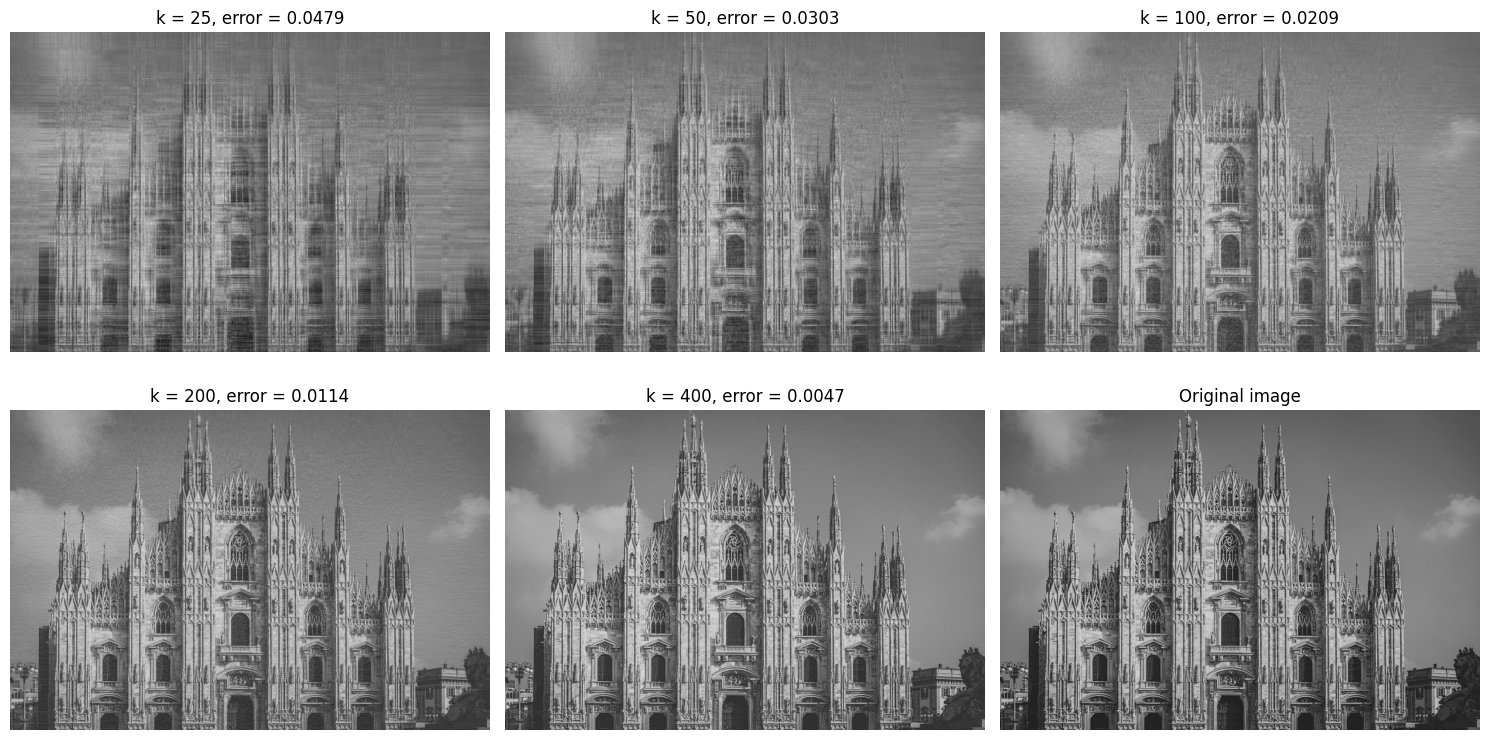

In [6]:
# Randomized SVD with oversampling

k_s = [25, 50, 100, 200, 400]

fig, ax = plt.subplots(2, 3, figsize = (15, 8))
ax = ax.flatten()

errors_rand_SVD_oversampling = []

for i, k in enumerate(k_s):
    U_rand, S_rand, VT_rand = randomized_svd(A, int(k * 1.5))
    A_k = U_rand[:, :k] @ np.diag(S_rand[:k]) @ VT_rand[:k, :]

    error = np.linalg.norm(A - A_k, 2) / np.linalg.norm(A, 2)
    errors_rand_SVD_oversampling.append(error)

    ax[i].imshow(A_k, cmap = 'gray')
    ax[i].axis('off')
    ax[i].set_title(f'k = {k}, error = {error:.4f}')

# Original image
ax[5].imshow(A, cmap = 'gray')
ax[5].axis('off')
ax[5].set_title('Original image')

plt.tight_layout()
plt.show()

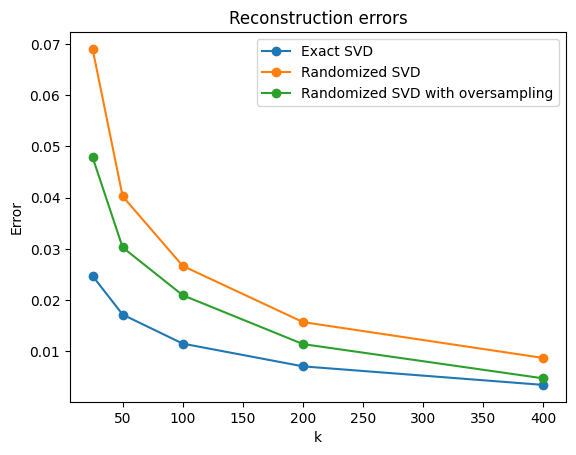

In [7]:
# Reconstruction errors
fig, ax = plt.subplots()

ax.plot(k_s, errors_exact, 'o-', label = 'Exact SVD')
ax.plot(k_s, errors_rand_SVD, 'o-', label = 'Randomized SVD')
ax.plot(k_s, errors_rand_SVD_oversampling, 'o-', label = 'Randomized SVD with oversampling')

ax.set_title('Reconstruction errors')
ax.set_xlabel('k')
ax.set_ylabel('Error')
ax.legend()

plt.show()

As we expected, we observe that the lowest registered reconstruction errors are the ones obtained by the exact SVD algorithm. We have to rememeber that the low-rank reconstruction that minimizes the error is the one obtained by this algorithm. The randomized algorithm inserts uncertainty to the process, resulting in an approximate result to the exact one. As a result, we obtain a higher error on the randomized SVD. Note that this error is reduced when we do oversampling, because the higher the sampling rank, the close the approximation is to the exact SVD. 

A big advantage, although not pictured in this exercise, is that by using the randomized SVD, we obtain fairly good results while greatly reducing the amount of computations (and therefore, time) to execute the compression algorithm. This can show a big difference when the images are bigger, or with a higher resolution.

#### 3) Evaluate the time needed to compute SVD with the 3 previous approaches ($k = 200$).

In [50]:
import time

# Time comparison
k = 200

t0 = time.time()
U, S, VT = np.linalg.svd(A, full_matrices = False)
t1 = time.time()
print(f'Exact SVD: {t1 - t0:.4f} sec')

t0 = time.time()
U_rand, S_rand, VT_rand = randomized_svd(A, k)
t1 = time.time()
print(f'Randomized SVD: {t1 - t0:.4f} sec')

t0 = time.time()
U_rand, S_rand, VT_rand = randomized_svd(A, int(k * 1.5))
t1 = time.time()
print(f'Randomized SVD with oversampling: {t1 - t0:.4f} sec')


Exact SVD: 1.3786 sec
Randomized SVD: 0.4699 sec
Randomized SVD with oversampling: 0.5961 sec


### Exercise 2

Consider the following function:
$$f(\mathbf{x}) = 5 x^2 - 6 xy + 5y^2 + 4x + 4y$$

#### 1) Plot the function

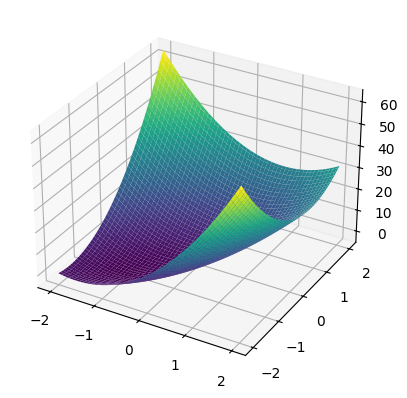

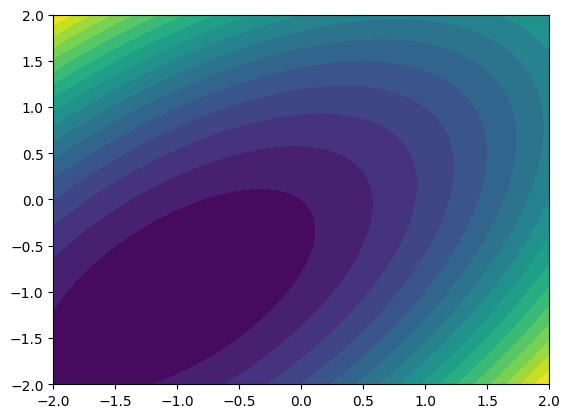

In [20]:
f = lambda x: 5 * x[0] * x[0] - 6 * x[0] * x[1] + 5 * x[1] * x[1] + 4 * x[0] + 4 * x[1]

x = np.linspace(-2, 2, 100)
y = np.linspace(-2, 2, 100)

X, Y = np.meshgrid(x, y)
Z = f([X, Y])

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.plot_surface(X, Y, Z, cmap = 'viridis')

fig = plt.figure()
ax = fig.add_subplot(111)
ax.contourf(X, Y, Z, levels = 20)

plt.show()

#### 2) Compute analitically the value $\mathbf{x}_{\min}$

**Answer:**

We just need to set the gradient of the function equal to 0, as the function is convex:

$$\nabla f = (10 x - 6y + 4, -6x + 10y + 4)$$
$$\nabla f = (0, 0) \iff \begin{cases} 10 x - 6y = -4 \\ -6 x + 10 y = -4 \end{cases}$$

$$\iff x = -1, \quad y = -1$$

Indeed:

In [24]:
matrix = np.array([
    [10, -6],
    [-6, 10]
])

b = np.array([-4, -4])
x = np.linalg.solve(matrix, b)

print(f'x = {x}')
print(f'f(x) = {f(x) : .2f}')

x = [-1. -1.]
f(x) = -4.00


#### 3) Write the function as:

$$f(x) = \frac{1}{2} x^T H x + d^T x + c$$

**Answer:**

To do so, notice that, if the function can be expressed in that form, then:
$$\nabla^2 f (x) = H$$

So, to get $H$, we need to calculate the Hessian of the given function:

$$\nabla^2 f(x) = \begin{bmatrix} 10 & -6 \\ -6 & 10 \end{bmatrix} = H$$

Now, to get $d$, we can leverage that:
$$\nabla f(x) = Hx + d$$

Then:

$$\begin{bmatrix} 10x - 6 y + 4 \\ -6x + 10 y + 4 \end{bmatrix} = \begin{bmatrix} 10x - 6 y \\ -6x + 10 y \end{bmatrix} + d$$

So we end with:

$$H = \begin{bmatrix} 10 & -6 \\ -6 & 10 \end{bmatrix}, \quad d = \begin{bmatrix}4 \\ 4 \end{bmatrix}$$

And the constant term is $c = 0$, as we don't have any constant terms in the original function. As we said before, $H$ represents the Hessian of the function.

#### 4) Consider the GD method. Find an expression for the maximum learning rate:

**Answer:**

The iteration step for the GD algorithm is as follows:

$$x^{(k+1)} = x^{(k)} - \alpha \nabla f(x^{k})$$

We know that $\nabla f(x) = Hx + d$, so:

$$x^{(k+1)} = x^{(k)} - \alpha (Hx + d)$$

By ignoring the constant term $d$ (doesn't affect to the convergence), we rearrange the terms to obtain the iteration matrix:

$$x^{(k+1)} = (I - \alpha H) x^{(k)}$$

To converge, the following condition should happen:

$$|\rho(I - \alpha H)| < 1$$

$$\iff |\lambda_i (I - \alpha H) | < 1, \quad \forall i$$
$$\iff |1 - \alpha \lambda_i (H) | < 1, \quad \forall i$$
$$\iff 0 < \alpha \lambda_i(H) < 2, \quad \forall i$$

$$\iff 0 < \alpha < \frac{2}{\lambda_{\max}(H)}$$

So the upper bound for ensuring convergence is $\frac{2}{\lambda_{\max}(H)}$

#### 5) Find the value of $\alpha_{\max}$ for the GD applied to the function

In [41]:
H = np.array([
    [10, -6],
    [-6, 10]
])

eigs = np.linalg.eigvalsh(H)
max_eig = np.max(eigs)

alpha_max = 2 / max_eig
print(f'alpha_max = {alpha_max}')

alpha_max = 0.125


#### 6) Implement the GD method and verify the conclusion drawn at the previous point. Use the stopping criteria $E < \epsilon$, with $E = |f(x^{k}) - f(x^{(k-1)})|$. Take $\epsilon = 10^{-3}$, max iters of 200 and the initial point $x = (-5, 7)$

In [49]:
from jax import grad


def GD(
    f: callable, x0, alpha: float, num_iter: int = 1000, tol: float = 1e-6
):
    
    x = x0
    
    for i in range(num_iter):
        grad_f = grad(f)(x)
        x_new = x - alpha * grad_f
        
        if np.abs(f(x_new) - f(x)) < tol:
            break
        
        x = x_new
    
    return x_new


x0 = np.array([-5, 7], dtype = np.float64)
tol = 1e-3
alpha = alpha_max - 0.005

x_opt = GD(f, x0, alpha, tol = tol)

print(f'x_opt = {x_opt}')
print(f'f(x_opt) = {f(x_opt) : .2f}')

x_opt = [-1.0175104  -0.98248965]
f(x_opt) = -4.00
